In [3]:
import torch
from torchvision import models, transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the pre-trained Mask R-CNN model with ResNet-59 backbone
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [4]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [5]:
ig = Image.open("image5.jpg")

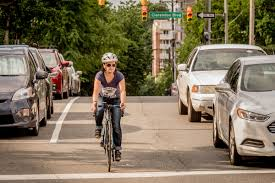

In [6]:
ig

In [7]:
transform = T.ToTensor()
img = transform(ig)

In [8]:
img


tensor([[[0.0392, 0.0588, 0.0667,  ..., 0.1804, 0.1020, 0.0157],
         [0.0235, 0.0235, 0.0431,  ..., 0.2353, 0.1922, 0.1451],
         [0.0549, 0.0706, 0.0863,  ..., 0.0980, 0.0941, 0.0863],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.5608, 0.5608, 0.5608],
         [0.4706, 0.4706, 0.4745,  ..., 0.5765, 0.5765, 0.5765],
         [0.4392, 0.4392, 0.4431,  ..., 0.7373, 0.7373, 0.7373]],

        [[0.0118, 0.0314, 0.0392,  ..., 0.1882, 0.1098, 0.0235],
         [0.0000, 0.0000, 0.0157,  ..., 0.2431, 0.2000, 0.1529],
         [0.0275, 0.0431, 0.0588,  ..., 0.1059, 0.1020, 0.0941],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.4549, 0.4549, 0.4549],
         [0.4000, 0.4000, 0.4039,  ..., 0.4706, 0.4706, 0.4706],
         [0.3686, 0.3686, 0.3725,  ..., 0.6353, 0.6353, 0.6353]],

        [[0.0000, 0.0000, 0.0078,  ..., 0.1020, 0.0235, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.1569, 0.1137, 0.0667],
         [0.0000, 0.0039, 0.0196,  ..., 0.0196, 0.0157, 0.

In [9]:
with torch.no_grad():
    pred = model([img])

In [10]:
pred

[{'boxes': tensor([[ 90.7510,  53.1561, 127.9308, 153.3676],
          [ 95.1238,  94.7235, 121.2745, 167.5587],
          [206.3925,  55.1151, 275.0000, 163.1118],
          [182.6889,  42.1380, 264.3991, 117.2020],
          [  1.2620,  44.9203,  52.7571, 135.4968],
          [ 36.4005,  48.0667,  70.7643,  99.2567],
          [ 22.4640,  46.4047,  61.6455, 106.5602],
          [140.7473,   2.3318, 147.9170,  21.2625],
          [ 32.0092,  51.3401,  54.0277, 117.3290],
          [  0.4567,  49.6345,  33.0030, 116.0924],
          [  0.4501,  44.3111,  54.5338, 133.8059],
          [175.4483,  56.4608, 196.8858, 118.4333],
          [186.8302,   5.9544, 192.5648,  19.5365],
          [204.9354,  33.4908, 208.8743,  41.0119],
          [176.4174,  47.5811, 216.1873, 122.2684],
          [157.3264,  45.7177, 272.2513, 168.2376],
          [ 37.3053,  47.2559,  73.0683, 101.2437],
          [191.9305,  81.1897, 217.0331, 117.7565],
          [213.3478,  76.4899, 274.7746, 166.8306],
   

In [11]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [12]:
num = torch.argwhere(scores>0.8).shape[0]
num

7

In [13]:
coco_names = ["person","bicycle", "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush",]

In [14]:
import cv2

In [15]:
igg = cv2.imread("image5.jpg")

In [16]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

90 53 127 153


In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    score = scores[i].item()
    score_text = f"{score:.2f}"
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    label = f"{class_name} ({score_text})"
    igg = cv2.putText(igg, label, (x1,y1-10),font,0.3,(255,0,0),1,cv2.LINE_AA)

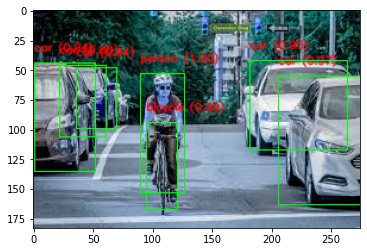

In [18]:
import matplotlib.pyplot as plt
plt.imshow(igg)

In [19]:
ig = Image.open("plane.jpg")
transform = T.ToTensor()
img = transform(ig)
with torch.no_grad():
    pred = model([img])

bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores>0.7).shape[0]
igg = cv2.imread("plane.jpg")



In [20]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

293 520 306 543


In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    score = scores[i].item()
    score_text = f"{score:.2f}"
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    label = f"{class_name} ({score_text})"
    igg = cv2.putText(igg, label, (x1,y1-10),font,0.9,(255,0,0),1,cv2.LINE_AA)

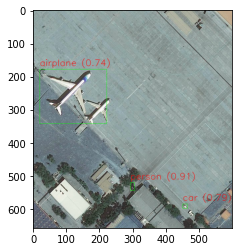

In [22]:
import matplotlib.pyplot as plt
plt.imshow(igg)

In [134]:
ig = Image.open("acars.jpg")
transform = T.ToTensor()
img = transform(ig)
with torch.no_grad():
    pred = model([img])

bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores>0.8).shape[0]


igg = cv2.imread("acars.jpg")

In [135]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

1428 542 1498 669


In [136]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    score = scores[i].item()
    score_text = f"{score:.2f}"
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    label = f"{class_name} ({score_text})"
    igg = cv2.putText(igg, label, (x1,y1-10),font,0.9,(255,0,0),1,cv2.LINE_AA)

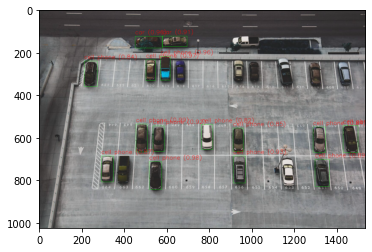

In [137]:
import matplotlib.pyplot as plt
plt.imshow(igg)

In [41]:
import torch
from PIL import Image
import os
from pycocotools.coco import COCO
import numpy as np

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
ann_file = r'C:\Users\LENOVO\Practices\nf2\subset_annotations.json'  # COCO annotation file
image_dir = r'C:\Users\LENOVO\Practices\nf2'  # Folder containing original images

# Load COCO annotations
coco = COCO(ann_file)

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# For calculating precision
total_true_positives = 0
total_false_positives = 0

# Get all image IDs
image_ids = coco.getImgIds()

# Process each image
for img_id in image_ids:
    # Load image and its annotations
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join(image_dir, img_info['file_name'])
    image = Image.open(image_path).convert('RGB')
    
    # Transform the image (if necessary)
    image_tensor = T.ToTensor()(image).unsqueeze(0)
    
    # Ground truth annotations
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    true_boxes = [ann['bbox'] for ann in anns]  # Ground truth bounding boxes
    
    # Convert COCO bbox format (x, y, width, height) to (x1, y1, x2, y2)
    true_boxes = [[x, y, x + w, y + h] for (x, y, w, h) in true_boxes]
    
    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)
    
    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores
    
    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]
    
    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0
    
    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None
        
        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1
    
    total_true_positives += true_positives
    total_false_positives += false_positives

    print(f"Processed image: {img_info['file_name']} - True Positives: {true_positives}, False Positives: {false_positives}")

# Calculate Precision
precision = total_true_positives / (total_true_positives + total_false_positives)

print(f"Overall Precision: {precision:.4f}")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Processed image: 2008_000138_jpg.rf.824d644432d3ca8bd695c98917a539f3.jpg - True Positives: 3, False Positives: 0
Processed image: 2011_004188_jpg.rf.4e0be9332df979cfe5c206341acb9c4a.jpg - True Positives: 1, False Positives: 1
Processed image: 2011_006966_jpg.rf.b95914fd1c0f6a78b14702065636b085.jpg - True Positives: 4, False Positives: 4
Processed image: 2008_003841_jpg.rf.593479a56eecc9d9b20d5dcf1bb9e006.jpg - True Positives: 1, False Positives: 0
Processed image: 2010_006329_jpg.rf.f43fa1b2045931bb4fad2f873e377b45.jpg - True Positives: 0, False Positives: 20
Processed image: 2008_001026_jpg.rf.133bbe5ff82e330061956672f128a946.jpg - True Positives: 1, False Positives: 0
Processed image: 2009_000351_jpg.rf.e806c5c3ea3c9e59b894ddbc48305c4c.jpg - True Positives: 0, False Positives: 0
Processed image: 2010_005734_jpg.rf.83b7cb1975b242f715453de44929f96e.jpg - True Positives: 1, False Positives: 1
Processed im

In [44]:
recall = total_true_positives / (total_true_positives + total_false_negatives)
print(f"Overall Recall: {recall:.4f}")
f1_score = (2 * (precision*recall)) / (precision+recall)

# Print the F1 score
print(f"F1 Score: {f1_score:.4f}")

Overall Recall: 1.0000
F1 Score: 0.6992


In [46]:
import torch
from PIL import Image
import os
import numpy as np
import torchvision.transforms as T  # Assuming you're using torchvision transforms

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
image_dir = r'C:\Users\LENOVO\Practices\val\images'  # Folder containing original images
label_dir = r'C:\Users\LENOVO\Practices\val\labels'  # Folder containing label files

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# For calculating precision and recall
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0

# Get all image filenames (assuming they have corresponding label files)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Load image
    image = Image.open(image_path).convert('RGB')

    # Ground truth annotations (from label file)
    true_boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                
                # Convert from YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)
                x1 = (x_center - width / 2) * image.width
                y1 = (y_center - height / 2) * image.height
                x2 = (x_center + width / 2) * image.width
                y2 = (y_center + height / 2) * image.height
                
                true_boxes.append([x1, y1, x2, y2])

    # Transform the image
    image_tensor = T.ToTensor()(image).unsqueeze(0)

    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)

    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores

    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]

    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0

    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None

        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1

    # Count false negatives: ground truth boxes that were not matched
    false_negatives = len(true_boxes) - len(matched_true_boxes)

    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives

    print(f"Processed image: {image_file} - True Positives: {true_positives}, False Positives: {false_positives}, False Negatives: {false_negatives}")

# Calculate Precision and Recall
precision = total_true_positives / (total_true_positives + total_false_positives) if (total_true_positives + total_false_positives) > 0 else 0
recall = total_true_positives / (total_true_positives + total_false_negatives) if (total_true_positives + total_false_negatives) > 0 else 0

print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")


Processed image: frame_0399.jpg - True Positives: 4, False Positives: 1, False Negatives: 2
Processed image: frame_0400.jpg - True Positives: 4, False Positives: 1, False Negatives: 2
Processed image: frame_0401.jpg - True Positives: 4, False Positives: 1, False Negatives: 2
Processed image: frame_0402.jpg - True Positives: 4, False Positives: 1, False Negatives: 2
Processed image: frame_0403.jpg - True Positives: 3, False Positives: 0, False Negatives: 3
Processed image: frame_0404.jpg - True Positives: 4, False Positives: 0, False Negatives: 2
Processed image: frame_0405.jpg - True Positives: 3, False Positives: 0, False Negatives: 3
Processed image: frame_0406.jpg - True Positives: 4, False Positives: 1, False Negatives: 2
Processed image: frame_0407.jpg - True Positives: 3, False Positives: 1, False Negatives: 3
Processed image: frame_0408.jpg - True Positives: 4, False Positives: 1, False Negatives: 2
Processed image: frame_0409.jpg - True Positives: 3, False Positives: 2, False N

In [47]:
recall = total_true_positives / (total_true_positives + total_false_negatives)
print(f"Overall Recall: {recall:.4f}")
f1_score = (2 * (precision*recall)) / (precision+recall)

# Print the F1 score
print(f"F1 Score: {f1_score:.4f}")

Overall Recall: 0.6004
F1 Score: 0.6066
